### Problem Statement
Akshay decided to use probability distributions for finding outliers and other useful information about the athletes while also understanding the spread of the dataset. He wanted to use basic distributions such as normal distributions, binomial distributions, uniform distributions, etc. Akshay also has another dataset from which he hopes to examine the earnings of different athletes. Akshay also wants to uncover outliers in the data as well as the most likely combinations of elements.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import scipy.stats as st

In [3]:
import plotly.express as px

###  Perform Exploratory Analysis
Finding and handling null values.

In [4]:
df =pd.read_csv("aus.csv")

In [5]:
df.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [7]:
df.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt', 'sex', 'sport'],
      dtype='object')

In [8]:
df["sport"].unique()

array(['B_Ball', 'Row', 'Netball', 'Swim', 'Field', 'T_400m', 'T_Sprnt',
       'Tennis', 'Gym', 'W_Polo'], dtype=object)

In [9]:
df.isnull().sum()

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
for i in df.columns:
    print(i,df[i].nunique())

rcc 114
wcc 70
hc 105
hg 55
ferr 111
bmi 180
ssf 176
pcBfat 180
lbm 135
ht 147
wt 161
sex 2
sport 10


###  Normal Distrbution 

C:\Users\kunal sahu\AppData\Local\Temp\ipykernel_312\1535039091.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['bmi'],bins=50,kde=True,color='royalblue',hist_kws={'linewidth':1,'alpha':1})
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

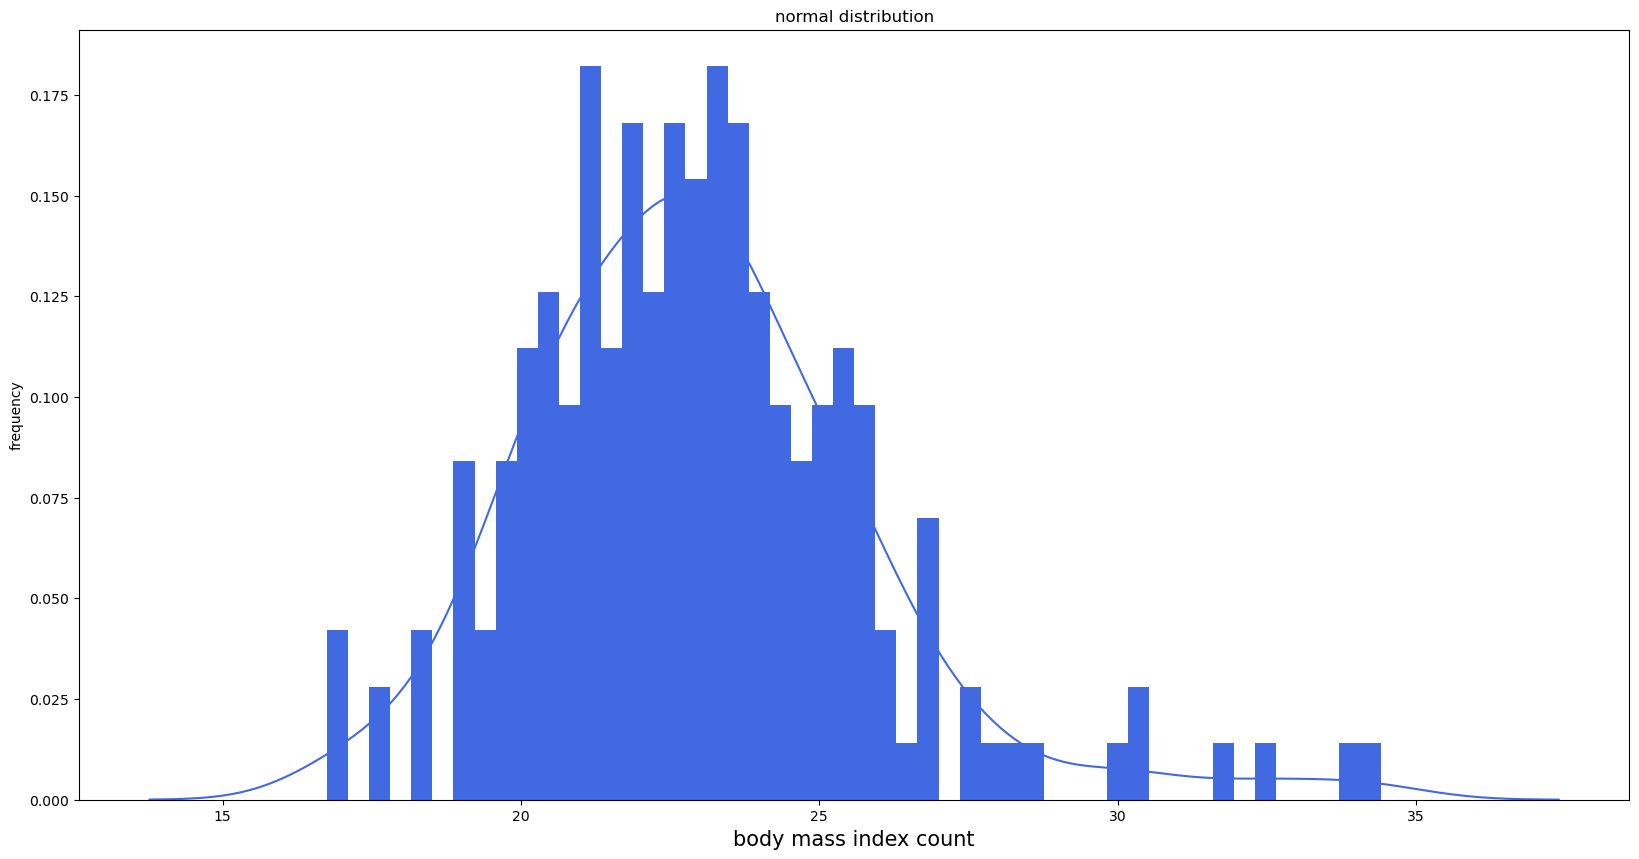

In [13]:
import scipy.stats as stats
plt.figure(figsize=(20,10))
ax = sns.distplot(df['bmi'],bins=50,kde=True,color='royalblue',hist_kws={'linewidth':1,'alpha':1})
plt.xlabel("body mass index count",fontsize=15)
plt.ylabel('frequency')
plt.title('normal distribution')
plt.plot()

In [14]:
from scipy.stats import skew

In [15]:
print(skew(df['bmi'],axis=0,bias=True))

0.9465155132505845


In [16]:
from scipy.stats import kurtosis

In [17]:
print('kurtosis of the graph is ',kurtosis(df['bmi'],axis=0,bias=True))


kurtosis of the graph is  2.1834749739437314


C:\Users\kunal sahu\AppData\Local\Temp\ipykernel_312\1374743609.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  mm = sns.distplot(df['ssf'],bins=50,kde=True,color="royalblue",hist_kws={'linewidth':15,"alpha":1})
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

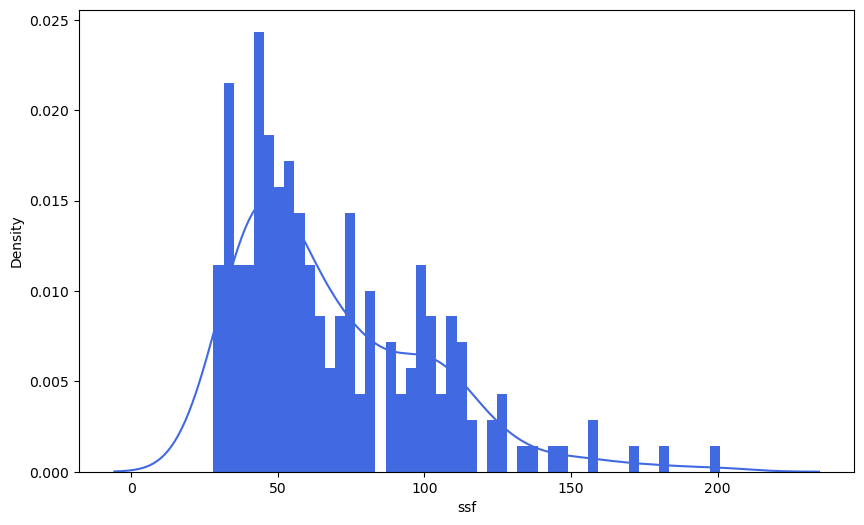

In [18]:
plt.figure(figsize=(10,6))
mm = sns.distplot(df['ssf'],bins=50,kde=True,color="royalblue",hist_kws={'linewidth':15,"alpha":1})
plt.plot()

In [19]:
from scipy.stats import skew

In [20]:
from scipy.stats import kurtosis

In [21]:
print(skew(df['ssf'],axis=0,bias=True))

1.174668451511767


In [22]:
print(kurtosis(df['ssf'],axis=0,bias=True))

1.3651352231700065


### Uniform Distribution


In [23]:
df.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt', 'sex', 'sport'],
      dtype='object')

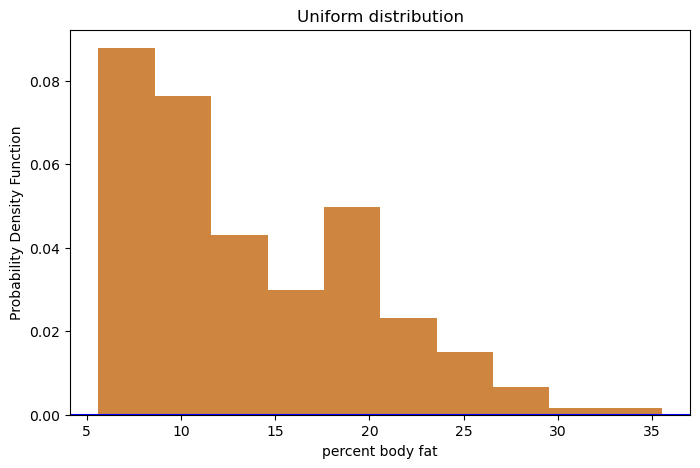

In [24]:
from scipy.stats import uniform
x= df['pcBfat']
plt.figure(figsize=(8,5))
plt.hist(x, density=True,color='peru')
plt.axhline(y=uniform.pdf(x[0]),color='b')
plt.title("Uniform distribution")
plt.ylabel('Probability Density Function')
plt.xlabel('percent body fat')
plt.show()

#####  Binomial Distribution

In [25]:
df['sport'].unique()

array(['B_Ball', 'Row', 'Netball', 'Swim', 'Field', 'T_400m', 'T_Sprnt',
       'Tennis', 'Gym', 'W_Polo'], dtype=object)

In [26]:
df1 = df[df['sport'] =="B_Ball"]
df2 = df[df['sport']== "Swim"]

In [27]:
df1.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [28]:
df2.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
58,4.36,5.5,41.4,13.8,82,22.42,71.3,14.52,55.39,170.0,64.8,f,Swim
59,4.07,5.9,39.5,13.3,25,20.42,54.6,11.47,52.23,170.0,59.0,f,Swim
60,4.17,4.9,38.9,12.9,86,22.13,88.2,17.71,59.33,180.5,72.1,f,Swim
61,4.23,8.1,38.2,12.7,22,25.17,95.4,18.48,61.63,173.3,75.6,f,Swim
62,4.46,8.3,42.2,14.4,30,23.72,47.5,11.22,63.39,173.5,71.4,f,Swim


C:\Users\kunal sahu\AppData\Local\Temp\ipykernel_312\440677821.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df1['ht'],bins=80,kde =False,color="coral",hist_kws={'linewidth':15,'alpha':1})


[]

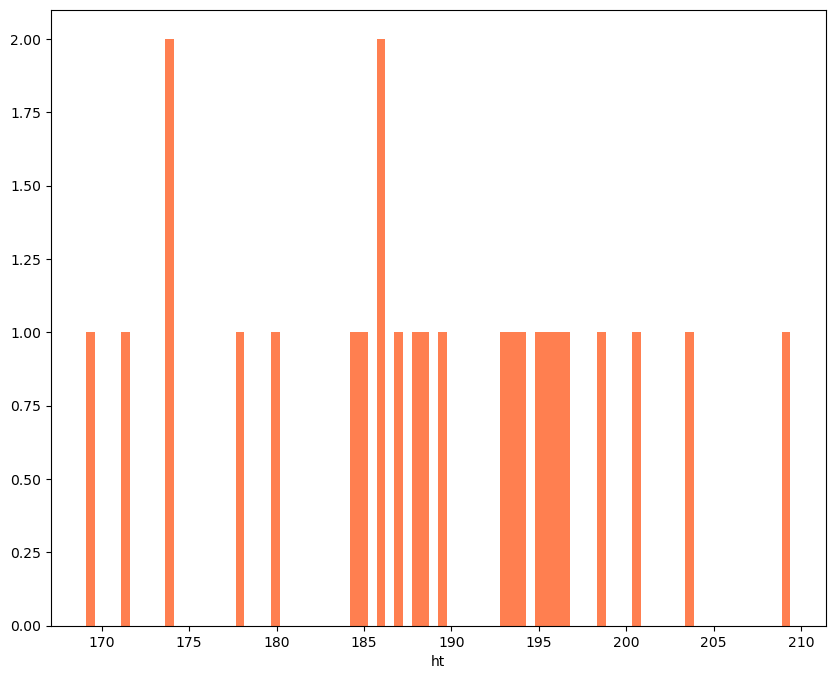

In [29]:
# plotting a histogram for baseball athletes height
plt.figure(figsize=(10,8))
ax = sns.distplot(df1['ht'],bins=80,kde =False,color="coral",hist_kws={'linewidth':15,'alpha':1})
plt.plot()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

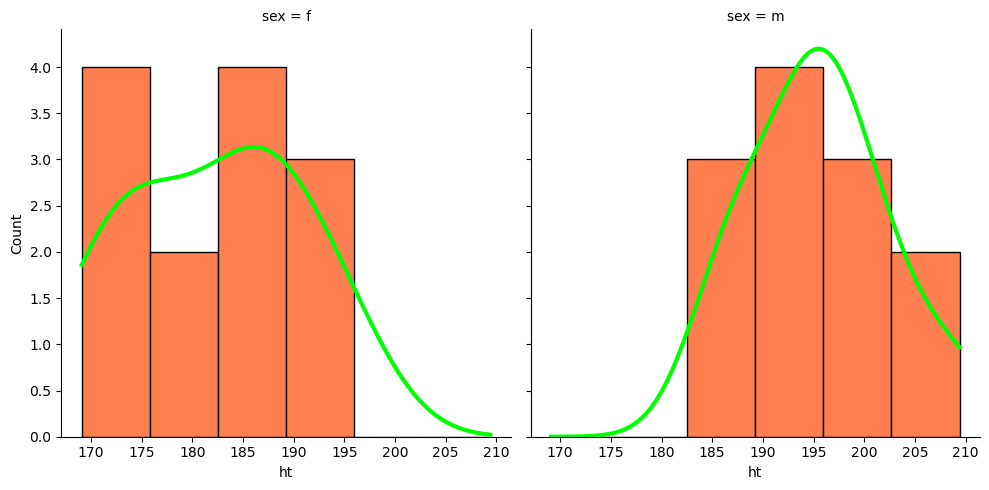

In [30]:
# plotting a histogram based on sex for baseball athletes height 
ax = sns.displot( data=df1,x='ht',
                  kde=True, col='sex',color='lime',line_kws = {'lw':3},facecolor='coral',edgecolor='black')
plt.show()


C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


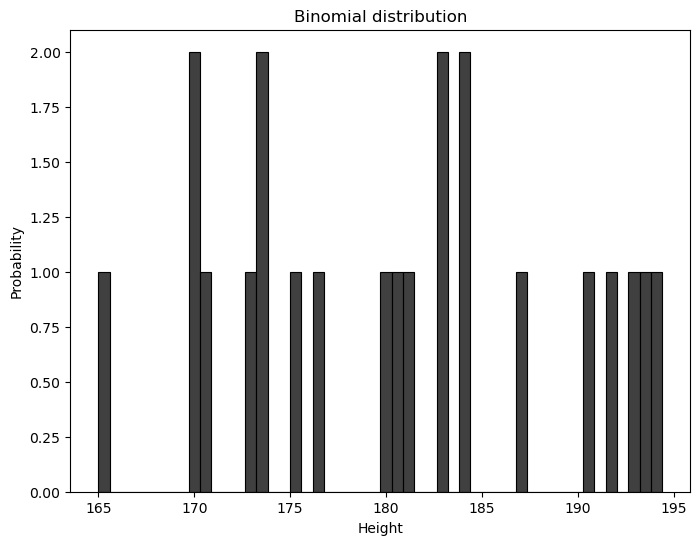

In [31]:
# plotting a histogram for swimming athletes height
plt.figure(figsize=(8,6))
ax = sns.histplot(df2['ht'],bins=50,kde=False,color='black')
plt.title('Binomial distribution')
plt.ylabel('Probability')
plt.xlabel('Height')
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

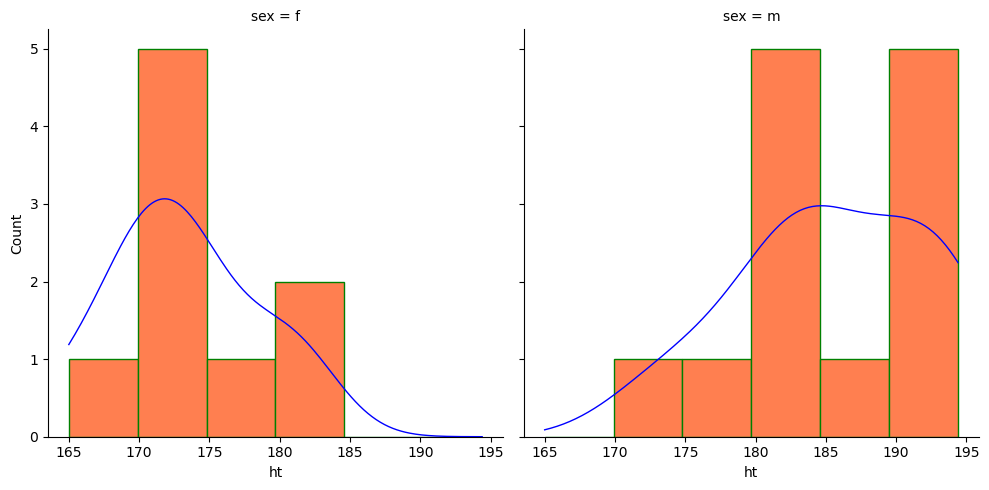

In [32]:
# plotting a histogram based on sex for swimming athletes height 
sns.displot(data=df2,x='ht',col='sex',color='blue',kde=True,line_kws={'lw':1},facecolor='coral',edgecolor='green')

    

C:\Users\kunal sahu\AppData\Local\Temp\ipykernel_312\4161497919.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df1['wt'], bins=90, kde=False, hist_kws={'linewidth':15,"alpha":1},color="goldenrod")


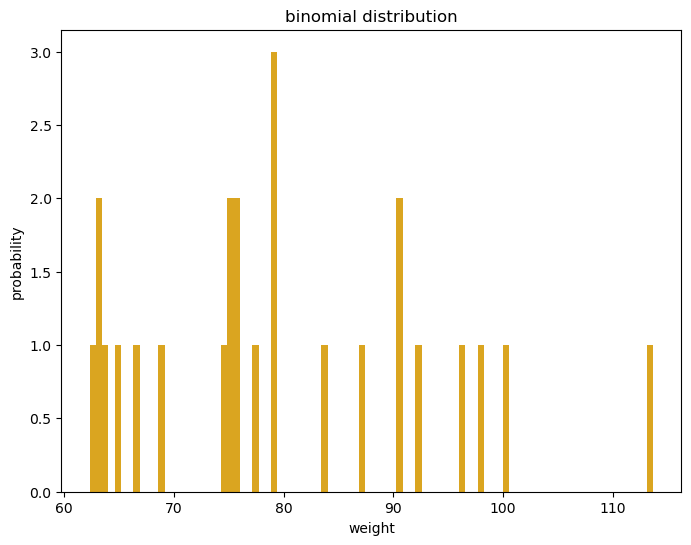

In [33]:
plt.figure(figsize=(8,6))
ax = sns.distplot(df1['wt'], bins=90, kde=False, hist_kws={'linewidth':15,"alpha":1},color="goldenrod")
plt.title("binomial distribution")
plt.ylabel('probability')
plt.xlabel('weight')
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

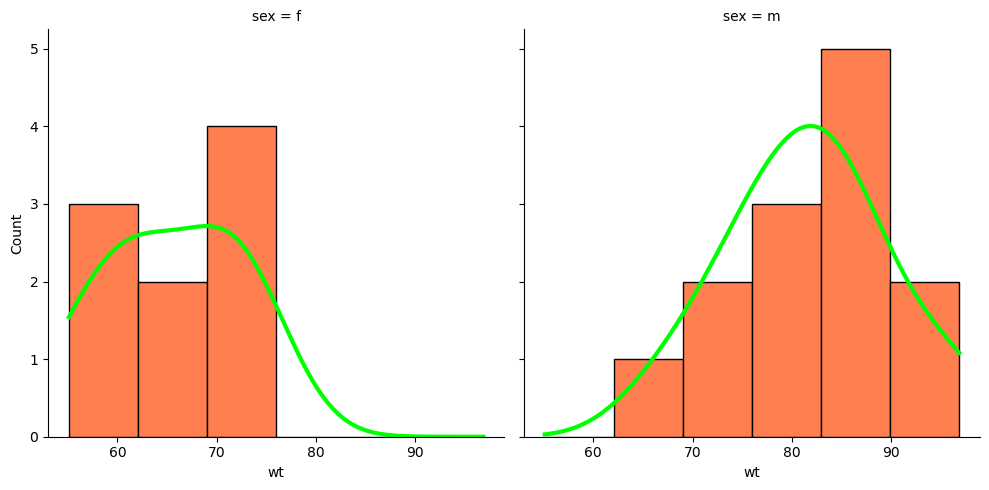

In [34]:

# plotting a histogram based on sex for swimming athletes weight
ax= sns.displot(data=df2,x='wt',col="sex",color="lime",kde=True,facecolor='coral',line_kws={"lw":3})

###  Bernoulli Distribution

In [36]:
df.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt', 'sex', 'sport'],
      dtype='object')

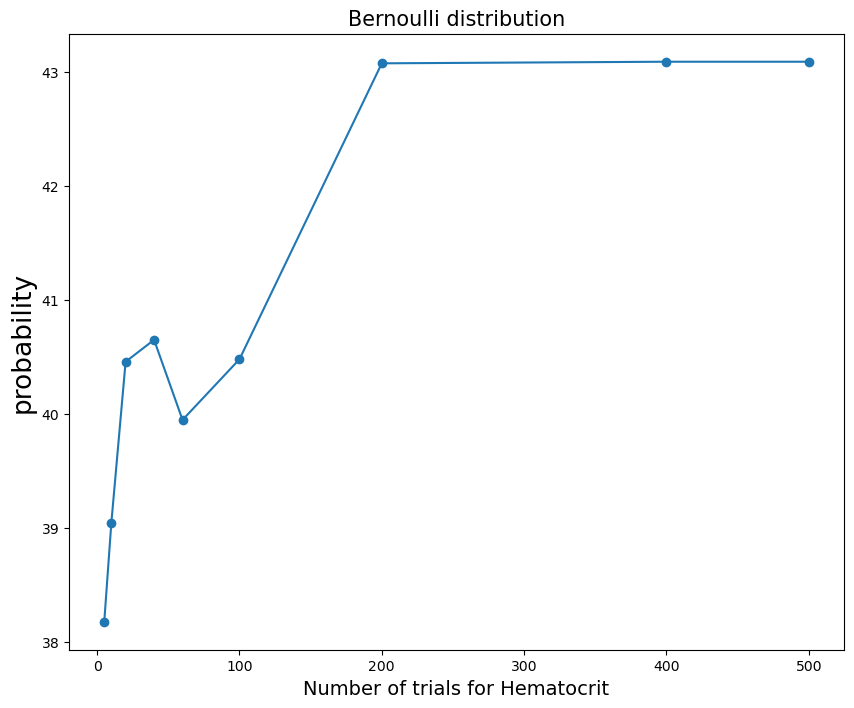

In [46]:
sample= df['hc']
num_trail= [5,10,20,40,60,100,200,400,500]
plt.figure(figsize=(10,8))
points = [sample[0:l].mean() for l in num_trail]
plt.plot(num_trail,points,marker='o')
plt.xlabel("Number of trials for Hematocrit", fontsize = 14)
plt.ylabel("probability" , fontsize= 19)
plt.title('Bernoulli distribution', fontsize=15)
plt.show()

In [47]:
df.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt', 'sex', 'sport'],
      dtype='object')

[]

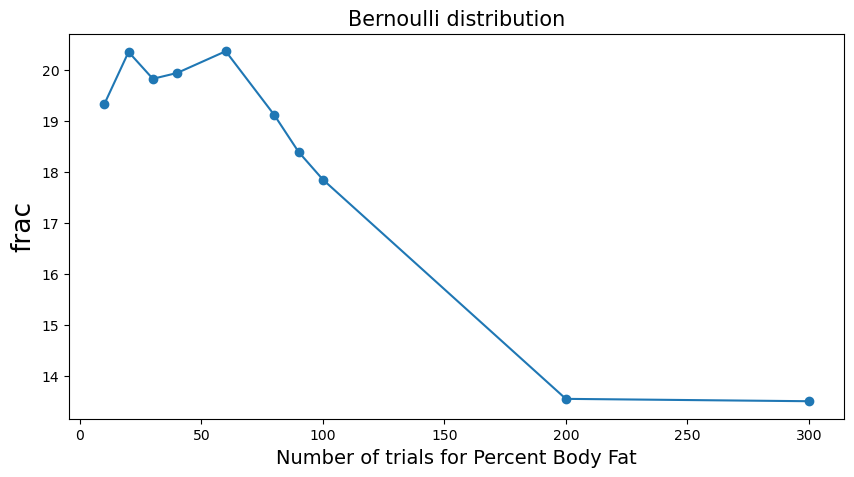

In [51]:
plt.figure(figsize=(10,5))
sample = df['pcBfat']
num_trials = [10,20,30,40,60,80,90,100,200,300]
points = [sample[0:l].mean() for l in num_trials]
plt.plot(num_trials,points,marker="o")
plt.xlabel('Number of trials for Percent Body Fat', fontsize = 14)
plt.ylabel('frac', fontsize= 19)
plt.title('Bernoulli distribution',fontsize= 15)
plt.plot()

###   Poisson Distribution

In [56]:
df1 = pd.read_csv("athletes.csv")

In [57]:
df1.head()

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1659 non-null   object 
 1   Earnings  1659 non-null   float64
 2   Year      1659 non-null   int64  
 3   Sport     1659 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 52.0+ KB


In [59]:
df1.isnull().sum()

Name        0
Earnings    0
Year        0
Sport       0
dtype: int64

In [61]:
df1.nunique()

Name        535
Earnings    477
Year         31
Sport        15
dtype: int64

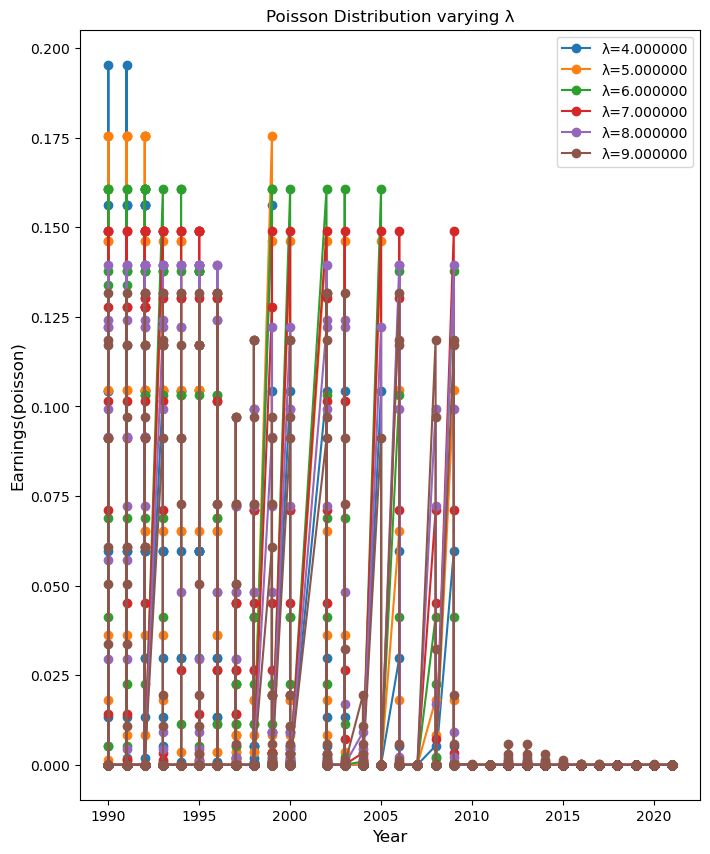

In [65]:
plt.figure(figsize=(8,10))
for lambd in range(4,10,1):
    n = df1["Year"]
    o= df1["Earnings"]
    poisson = stats.poisson.pmf(n,lambd)
    poisson1 = stats.poisson.pmf(o,lambd)
    #plt.plot(n,poisson,"-o",label="λ={:f}".format(lambd))
    plt.plot(n,poisson1,"-o",label="λ={:f}".format(lambd)) 
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Earnings(poisson)', fontsize=12)
    plt.title("Poisson Distribution varying λ")
    plt.legend()
    
    

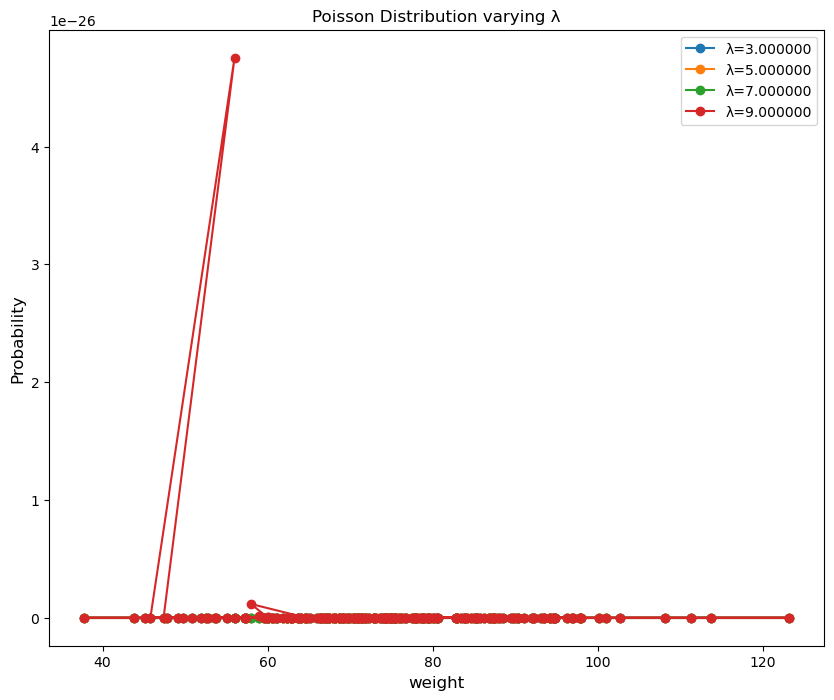

In [71]:
plt.figure(figsize=(10,8))
for lambd in range(3,10,2):
    n = df["wt"]
    poisson = stats.poisson.pmf(n,lambd)
    plt.plot(n, poisson,"-o", label="λ={:f}".format(lambd))
    plt.xlabel('weight', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Poisson Distribution varying λ")
    plt.legend()
    

###  Exponential Distribution 

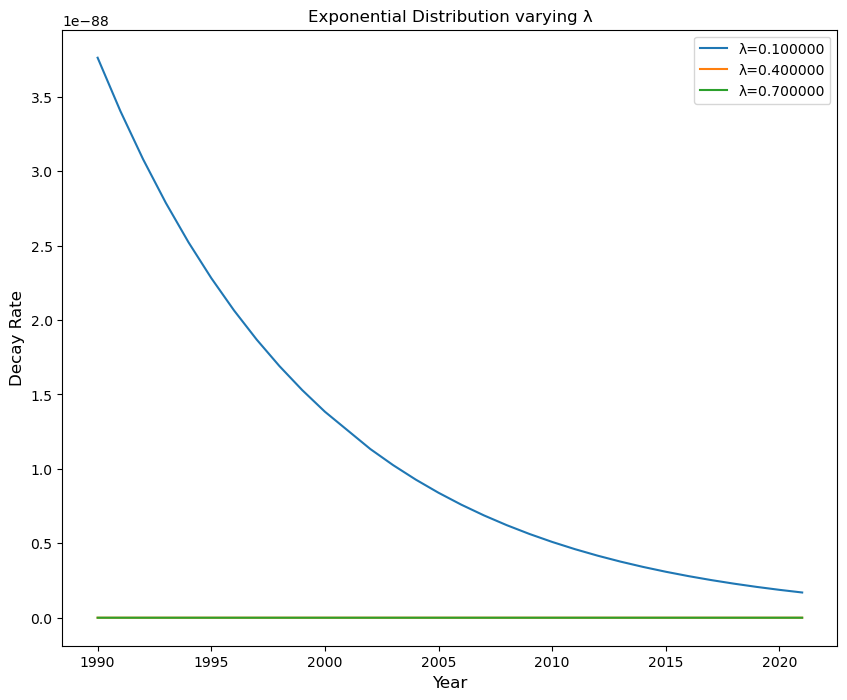

In [75]:
plt.figure(figsize=(10,8))
for lambd in range(1,10,3):
    x = df1['Year']
    y= 0.1*lambd*np.exp(-0.1*lambd*x)
    plt.plot(x,y,label= "λ={:f}".format(0.1*lambd))
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Decay Rate', fontsize=12)
    plt.title("Exponential Distribution varying λ")
    plt.legend()

In [ ]:
df

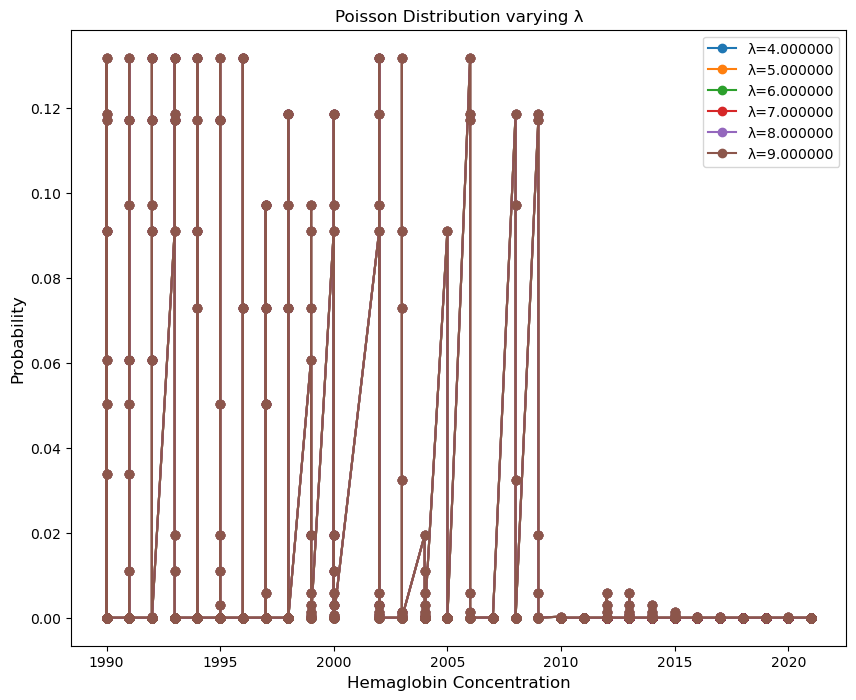

In [86]:
plt.figure(figsize=(10,8))
for lambd in range(4,10,1):
    n = df1["Year"]
    o = df1["Earnings"]
    poission = stats.poisson.pmf(n,lambd)
    poission2 = stats.poisson.pmf(o,lambd)
    #plt.plot(n,poisson,"-o",label="λ={:f}".format(lambd))
    plt.plot(n,poisson1,"-o",label="λ={:f}".format(lambd))
    plt.xlabel('Hemaglobin Concentration', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Poisson Distribution varying λ")
    plt.legend() 

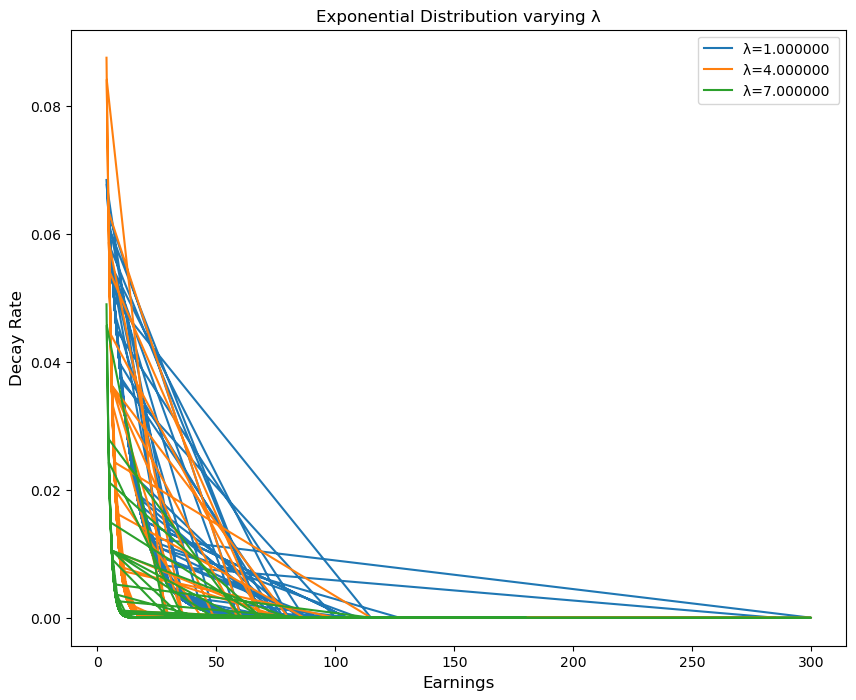

In [88]:
plt.figure(figsize=(10,8))
for lambd in range(1,10,3):
    x = df1["Earnings"]
    y = 0.1*lambd * np.exp(-0.1*lambd*x)
    plt.plot(x,y,label="λ={:f} ".format(lambd))
    plt.xlabel('Earnings', fontsize=12)
    plt.ylabel('Decay Rate', fontsize=12)
    plt.title("Exponential Distribution varying λ")
    plt.legend()

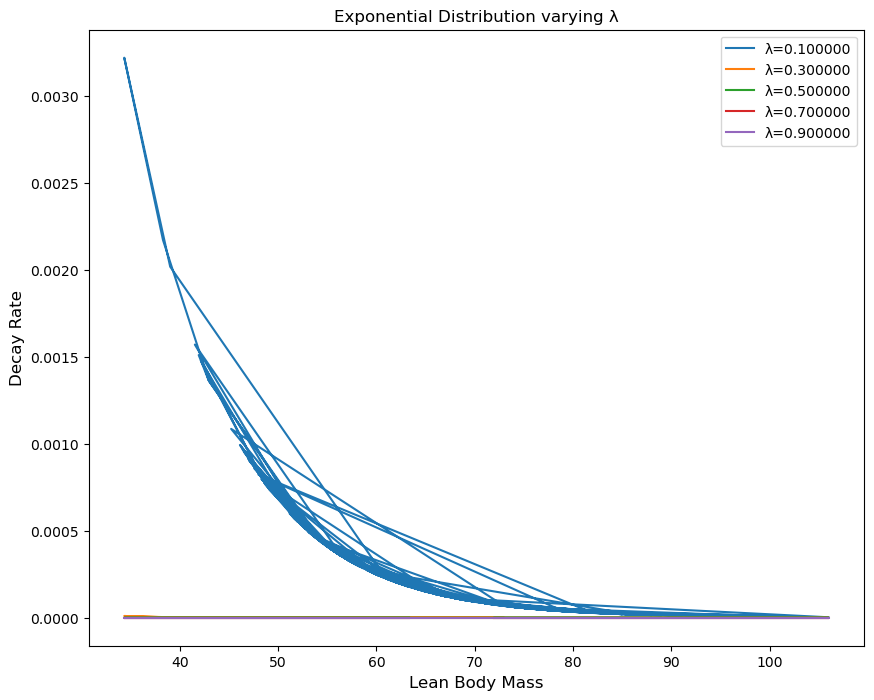

In [90]:
plt.figure(figsize=(10,8))
for lambd in range(1,10,2):
    x = df['lbm']
    y = 0.1*lambd*np.exp(-0.1*lambd*x)
    plt.plot(x,y,label= "λ={:f}".format(lambd*0.1))
    plt.xlabel('Lean Body Mass', fontsize=12)
    plt.ylabel('Decay Rate', fontsize=12)
    plt.title("Exponential Distribution varying λ")
    plt.legend()